## AI기반 챗봇 및 OCR 개발 전문가 과정

### 교과목명 : 머신러닝
- 평가일 : 24. 8. 5
- 성명 :  김성현
- 점수 :

Q1. load_breast_cancer 데이터셋을 불러와서 다음을 수행하세요.
- dt로 분류모델 생성 및 모델 정확도 평가(학습:검증 = 8:2)
- 하이퍼 파라미터는 분할 기준은 지니계수, 최대 깊이는 3으로 설정
- 결정트리를 시각화


In [1]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
# print("cancer.keys():\n", cancer.keys())
load_breast_cancer().keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [25]:
# 모델 학습 및 평가
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X = cancer.data
y = cancer.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dt = DecisionTreeClassifier(criterion='gini', max_depth=3)

dt.fit(X_train, y_train)

dt_fit = dt.fit(X_train, y_train)

pred = dt.predict(X_test)

accuracy = accuracy_score(y_test, pred)

print(f'정확도 : {accuracy}')

정확도 : 0.9385964912280702


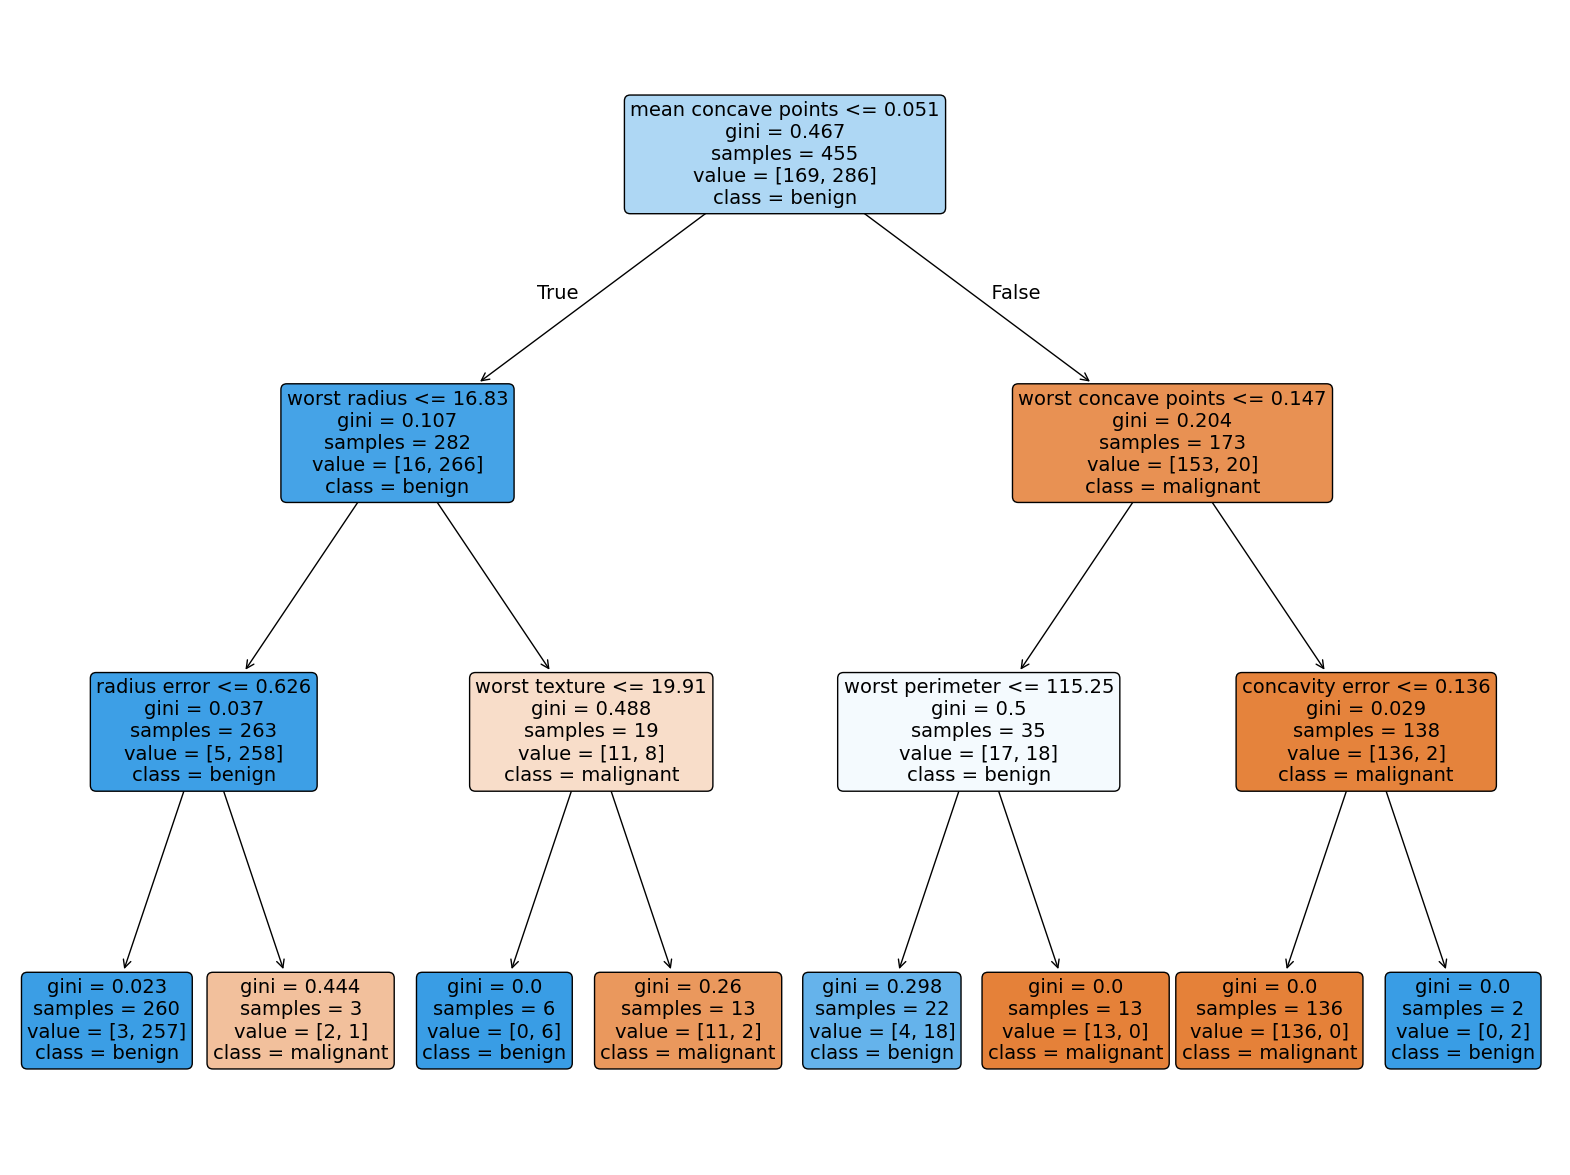

In [26]:
# 시각화
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 15))
tree.plot_tree(
    dt_fit,
    filled=True,
    feature_names=cancer.feature_names,
    class_names=cancer.target_names,
    rounded=True,
    fontsize=14,
)

plt.show()
plt.close()

Q2. 와인 데이터에 대해서 아래 사항을 고려하여 모델 생성 및 성능개선을 위한 하이퍼파라미터 튜닝을 수행한 후 테스트 데이터로 평가하세요.
- dt를 알고리즘으로 적용
- cv = 5
- param_grid = {'max_depth': [3, 4, 5, 6], 'min_samples_split': [2, 3, 4]}

In [27]:
from sklearn import datasets
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# 와인 데이터 불러오기
wine = datasets.load_wine()
X = wine.data
y = wine.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

dt = DecisionTreeClassifier()

param_grid = {"max_depth": [3, 4, 5, 6], "min_samples_split": [2, 3, 4]}

grid = GridSearchCV(dt, param_grid=param_grid, cv=5)

grid.fit(X_train, y_train)

print(f"최적의 하이퍼파라미터 : {grid.best_params_}")

pred = grid.best_estimator_.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print(f"정확도 : {accuracy}")

최적의 하이퍼파라미터 : {'max_depth': 3, 'min_samples_split': 2}
정확도 : 0.9444444444444444


Q3. 보스톤 주택가격 데이터셋에 대하여 규제 선형 모델인 릿지, 라쏘, 엘라스틱넷 모델로 교차검증을 수행하고 아래 각 모델의 알파값의 변화에 따른 회귀계수의 변화를 출력하세요. (단, 사용자 함수를 작성하여 수행)
- ridge_alphas = [0, 0.1, 1, 10, 100]
- lasso_alphas = [0.07,0.1,0.5,1,3]
- elastic_alphas = [0.07,0.1,0.5,1,3], L1:L2 = 0.7:0.3

In [28]:
import pandas as pd
from sklearn.datasets import fetch_openml
boston = fetch_openml(name="Boston", version=1, parser='auto')
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)
boston_df['PRICE'] = boston.target
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [12]:
# 필요한 feature이면 dtype 변환 -  category 타입을 먼저 수치형으로 변환
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   CRIM     506 non-null    float64 
 1   ZN       506 non-null    float64 
 2   INDUS    506 non-null    float64 
 3   CHAS     506 non-null    category
 4   NOX      506 non-null    float64 
 5   RM       506 non-null    float64 
 6   AGE      506 non-null    float64 
 7   DIS      506 non-null    float64 
 8   RAD      506 non-null    category
 9   TAX      506 non-null    float64 
 10  PTRATIO  506 non-null    float64 
 11  B        506 non-null    float64 
 12  LSTAT    506 non-null    float64 
 13  PRICE    506 non-null    float64 
dtypes: category(2), float64(12)
memory usage: 49.0 KB


In [13]:
#chas, rad 카테고리
boston_df.CHAS.value_counts()

CHAS
0    471
1     35
Name: count, dtype: int64

In [29]:
boston_df['CHAS'] = boston_df['CHAS'].astype(float)

In [14]:
boston_df.RAD.value_counts()

RAD
24    132
5     115
4     110
3      38
6      26
2      24
8      24
1      20
7      17
Name: count, dtype: int64

In [30]:
boston_df['RAD'] = boston_df['RAD'].astype(float)

In [31]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [32]:
X = boston_df.iloc[:, :-1]
y = boston_df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [35]:
# get_linear_reg_eval 사용자 함수
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.model_selection import cross_val_score
import numpy as np

def get_liner_reg_eval(model, X_train, y_train, X_test, y_test):
    ridge = Ridge()
    lasso = Lasso()
    elasticnet = ElasticNet()
    ridge_alphas = [0, 0.1, 1, 10, 100]
    lasso_alphas = [0.07,0.1,0.5,1,3]
    elastic_alphas = [0.07,0.1,0.5,1,3]

    if model == 'ridge':
        for alpha in ridge_alphas:
            ridge = Ridge(alpha=alpha)
            ridge.fit(X_train, y_train)
            cross = cross_val_score(ridge, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
            mse = np.mean(-cross)
            rmse = np.sqrt(mse)
            print(f'Ridge alpha {alpha}일 때 RMSE : {rmse}')
    elif model == 'lasso':
        for alpha in lasso_alphas:
            lasso = Lasso(alpha=alpha)
            lasso.fit(X_train, y_train)
            cross = cross_val_score(
                lasso, X_train, y_train, scoring="neg_mean_squared_error", cv=5
            )
            mse = np.mean(-cross)
            rmse = np.sqrt(mse)
            print(f'Lasso alpha {alpha}일 때 RMSE : {rmse}')
    else:
        for alpha in elastic_alphas:
            elasticnet = ElasticNet(alpha=alpha, l1_ratio=0.7)
            elasticnet.fit(X_train, y_train)
            cross = cross_val_score(
                elasticnet, X_train, y_train, scoring="neg_mean_squared_error", cv=5
            )
            mse = np.mean(-cross)
            rmse = np.sqrt(mse)
            print(f'ElasticNet alpha {alpha}일 때 RMSE : {rmse}')

In [36]:
# Ridge
get_liner_reg_eval('ridge', X_train, y_train, X_test, y_test)

Ridge alpha 0일 때 RMSE : 5.0968399455865105
Ridge alpha 0.1일 때 RMSE : 5.09839907703876
Ridge alpha 1일 때 RMSE : 5.120933586084132
Ridge alpha 10일 때 RMSE : 5.147290645607101
Ridge alpha 100일 때 RMSE : 5.2541463193333335


In [37]:
# Lasso
get_liner_reg_eval("lasso", X_train, y_train, X_test, y_test)

Lasso alpha 0.07일 때 RMSE : 5.1875714022746955
Lasso alpha 0.1일 때 RMSE : 5.195842774948454
Lasso alpha 0.5일 때 RMSE : 5.278355681243622
Lasso alpha 1일 때 RMSE : 5.544257994162193
Lasso alpha 3일 때 RMSE : 6.045605267133069


In [38]:
# Elasticnet
get_liner_reg_eval("elasticnet", X_train, y_train, X_test, y_test)

ElasticNet alpha 0.07일 때 RMSE : 5.172153792797354
ElasticNet alpha 0.1일 때 RMSE : 5.176033965938778
ElasticNet alpha 0.5일 때 RMSE : 5.285363670117872
ElasticNet alpha 1일 때 RMSE : 5.464657776704159
ElasticNet alpha 3일 때 RMSE : 5.95636022363429


Q4. iris 데이터셋에 대하여 n_components=2를 적용하고 TruncatedSVD를 사용하여 추출된 2개의 component로 품종을 구분하는 것을 시각화 하세요.

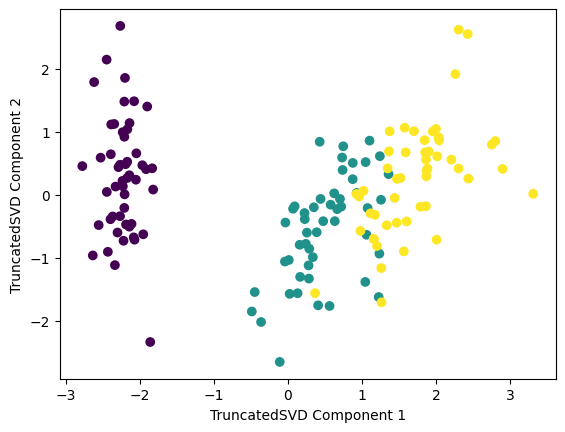

In [40]:
from sklearn.decomposition import TruncatedSVD, PCA
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


iris = load_iris()
iris_ftrs = iris.data

scaler = StandardScaler()
iris_scaled = scaler.fit_transform(iris_ftrs)
X_tsvd = TruncatedSVD(n_components=2)
X_tsvd = X_tsvd.fit_transform(iris_scaled)

plt.scatter(X_tsvd[:, 0], X_tsvd[:, 1], c=iris.target)
plt.xlabel("TruncatedSVD Component 1")
plt.ylabel("TruncatedSVD Component 2")
plt.show()

Q5. iris 데이터셋의 sepal length,	sepal width,	petal length,	petal width 4개의 독립변수로 군집화를 수행 시 최적의 군집수를 산출하세요. 단, 군집개수별시뮬레이션을 시각화해서 최적의 군집수에 대한 이유도 설명

In [41]:
# 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 실루엣 계수를 면적으로 시각화한 함수
def visualize_silhouette(cluster_lists, X_features):

    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math

    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)

    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)

    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):

        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산.
        clusterer = KMeans(n_clusters = n_cluster, n_init='auto', max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)

        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)

        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])

        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현.
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()

            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10

        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")


군집수 2일 때 실루엣 점수 : 0.6810461692117462
군집수 3일 때 실루엣 점수 : 0.551191604619592
군집수 4일 때 실루엣 점수 : 0.49805050499728737
군집수 5일 때 실루엣 점수 : 0.4609502384437903


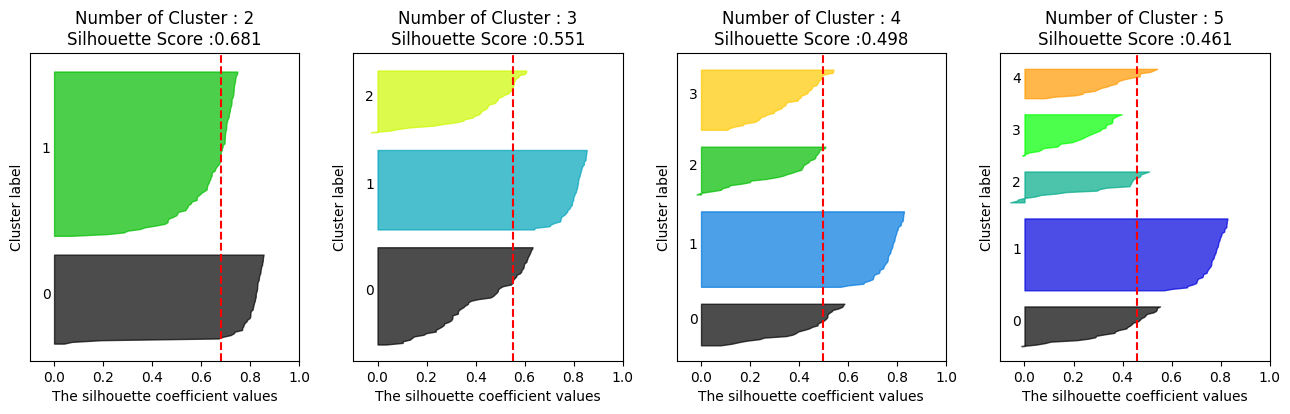

In [46]:
# iris 데이터셋의 sepal length,	sepal width,	petal length,	petal width 4개의 독립변수로 군집화를 수행 시 최적의 군집수를 산출하세요. 단, 군집개수별시뮬레이션을 시각화해서 최적의 군집수에 대한 이유도 설명
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pandas as pd

iris = load_iris()
df_iris = pd.DataFrame(
    data=iris.data,
    columns=["sepal length", "sepal width", "petal length", "petal width"],
)
visualize_silhouette([2, 3, 4, 5], iris.data)

# 최적의 군집수

clust_lists = [2, 3, 4, 5]
for n_cluster in clust_lists:
    kmeans = KMeans(n_clusters=n_cluster, random_state=0)
    kmeans.fit(iris.data)
    cluster_labels = kmeans.labels_
    sil_avg = silhouette_score(iris.data, cluster_labels)
    print(f'군집수 {n_cluster}일 때 실루엣 점수 : {sil_avg}')

점수에 의한 최적 클러스터 개수는 2개로 판단되지만, 시각화를 통해 데이터 포인트의 위치와 중심거리를 고려하면 3개인 경우도 최적 군집수로 판단할 수 있다. 
하지만 점수 와 시각화로 판단하기 어려운 경우가 있기 때문에 해당 주제에 대한 도메인 지식으로 판단해야 할것이다.

실습과제1. 실습과제 코드를 작성하세요.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
y = housing.target
X = housing.data

df = pd.DataFrame(X, columns=housing.feature_names)
df["Target"] = y

q1 = df["Target"].quantile(0.25)
q3 = df["Target"].quantile(0.75)
iqr = q3 - q1
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

df = df[(df["Target"] >= lower) & (df["Target"] <= upper)]

X = df.drop(["Target"], axis=1)
y = df["Target"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

models = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "SVR": SVR(),
    "DecisionTree": DecisionTreeRegressor(),
    "RandomForest": RandomForestRegressor(),
    "GradientBoosting": GradientBoostingRegressor(),
    "XGBoost": XGBRegressor(),
    "LightGBM": LGBMRegressor(),
}

pipelines = {}
param_grids = {}

for name, model in models.items():
    pipelines[name] = Pipeline([("scaler", StandardScaler()), ("model", model)])

    if name == "LinearRegression":
        param_grids[name] = {}
    elif name in ["Ridge", "Lasso"]:
        param_grids[name] = {"model__alpha": [0.05, 0.1, 1]}
    elif name == "SVR":
        param_grids[name] = {
            "model__kernel": ["linear", "rbf"],
            "model__C": [0.1, 1, 10],
        }
    elif name == "DecisionTree":
        param_grids[name] = {
            "model__max_depth": [5, 7, 9],
            "model__min_samples_split": [2, 5, 10],
        }
    elif name in ["RandomForest", "GradientBoosting"]:
        param_grids[name] = {
            "model__n_estimators": [300, 500, 1000],
            "model__max_depth": [5, 7, 9],
        }
    elif name == "XGBoost":
        param_grids[name] = {
            "model__n_estimators": [300, 500, 1000],
            "model__max_depth": [5, 7, 9],
            "model__learning_rate": [0.01, 0.1, 0.3],
        }
    elif name == "LightGBM":
        param_grids[name] = {
            "model__n_estimators": [300, 500, 1000],
            "model__max_depth": [5, 7, 9],
            "model__learning_rate": [0.01, 0.1, 0.3],
        }

# GridSearchCV를 사용한 모델 학습 및 평가
results = {}

for name, pipeline in pipelines.items():
    grid_search = GridSearchCV(
        pipeline, param_grids[name], cv=5, scoring="neg_mean_squared_error", n_jobs=-1
    )
    grid_search.fit(X_train, y_train)

    best_model = grid_search.best_estimator_
    mse = mean_squared_error(y_test, best_model.predict(X_test))

    results[name] = {
        "best_params": grid_search.best_params_,
        "mse": mse,
    }

for name, result in results.items():
    print(f"\n{name}:")
    print(f"Best parameters: {result['best_params']}")
    print(f"MSE: {result['mse']:.4f}")

best_model = min(results, key=lambda x: results[x]["mse"])
print(f"\nBest model: {best_model}")
print(f"MSE: {results[best_model]['mse']:.4f}")